## The Environment Parameters
* Use discount factor, $\gamma = 0.9$
* The environment is slippery, ie., the transition kernel is stochastic
* The environment consists of 16 states. 
* The agent can take 4 actions 

In [18]:
import gym
env = gym.make('FrozenLake-v1', desc=None,map_name="4x4", is_slippery=True)
gamma = 0.9

In [19]:
#Obtaining environment details 
print('Number of Actions', env.action_space.n) 
print('Number of States ', env.observation_space.n)


Number of Actions 4
Number of States  16


## Generating a Heatmap 
* Use the following function fancy_visual to obtain a heat map. The arguments to the function are the value function and its corresponding policy. 
* This function also prints the value function and policy. 

In [28]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()


# Policy Iteration

Value Function [0.06889090488900329, 0.061414571509356086, 0.07440976196616092, 0.05580732147462067, 0.09185453985200442, 0.0, 0.11220820641168608, 0.0, 0.1454363547656737, 0.24749695460123428, 0.29961759273945937, 0.0, 0.0, 0.3799359011656479, 0.6390201481186109, 0.0]
Policy [0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]


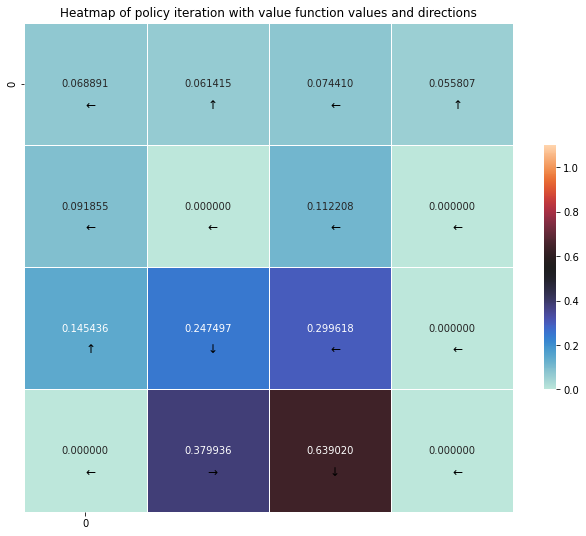

In [29]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

V = [0]*env.observation_space.n
policy = [0]*env.observation_space.n
policyIterations = 100
policyImprovementIterations = 100
norm = []

def policyIteration():
    for i in range(policyIterations):
        for state in range(env.observation_space.n):
            stateValue =0
            action = policy[state]
            for prob, nextState, reward, _ in env.P[state][action]:
                stateValue += prob*(reward + gamma*V[nextState])
            V[state] = stateValue

stable = False
for k in range(policyImprovementIterations):
    V_old = np.array(V.copy())
    policyIteration()
    
    stable = True
    for state in range(env.observation_space.n):
        actionValues = []
        for action in range(env.action_space.n):
            value = 0
            for prob, nextState, reward, _ in env.P[state][action]:
                value += prob*(reward + gamma*V[nextState])
            actionValues.append(value)
        policy[state] = np.argmax(np.array(actionValues))
    norm.append(LA.norm(np.subtract(np.array(V), V_old)))
            

fancy_visual(V, policy)
            
            
        

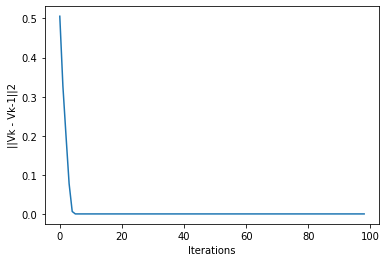

In [31]:
plt.plot(range(len(norm[1:])), norm[1:])
plt.xlabel('Iterations')
plt.ylabel('||Vk - Vk-1||2')
plt.show()